In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
df=pd.read_excel("startup_data.xlsx")
df.head()

,Month,Revenue ($),Marketing Spend ($),Operating Expenses ($),New Customers,Total Customers
0,Jan-2000,12612,2722,10496,154,154
1,Feb-2000,25787,5389,13962,100,231
2,Mar-2000,27159,4079,13299,124,331
3,Apr-2000,22206,4717,17917,59,364
4,May-2000,18226,4332,15574,191,541


In [5]:
print("Total rows and columns",df.shape)
print("\nDatatype details")
print(df.info())

Total rows and columns (1000, 6)

Datatype details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month                   1000 non-null   object
 1   Revenue ($)             1000 non-null   int64 
 2   Marketing Spend ($)     1000 non-null   int64 
 3   Operating Expenses ($)  1000 non-null   int64 
 4   New Customers           1000 non-null   int64 
 5   Total Customers         1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB
None


In [7]:
print("Before Standardizing")
print(df.columns.unique())
df.columns=df.columns.str.replace(r'[\!\@\#\$\%\^\&\*\(\)\_\+\-\=\;\'\:\"\,\.\/\<\>\?\s]+','_',regex=True).str.strip('_').str.lower()
print("After Standardizing")
print(df.columns.unique())

Before Standardizing
Index(['Month', 'Revenue ($)', 'Marketing Spend ($)', 'Operating Expenses ($)',
       'New Customers', 'Total Customers'],
      dtype='object')
After Standardizing
Index(['month', 'revenue', 'marketing_spend', 'operating_expenses',
       'new_customers', 'total_customers'],
      dtype='object')


In [9]:
print("no. of null values")
print(df.isnull().sum())
print("\nNo. of duplicate values")
df.duplicated().sum()

no. of null values
month                 0
revenue               0
marketing_spend       0
operating_expenses    0
new_customers         0
total_customers       0
dtype: int64

No. of duplicate values


0

In [11]:
print("Statistical Values:")
df.describe()

Statistical Values:


,revenue,marketing_spend,operating_expenses,new_customers,total_customers
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19886.41400,4487.488000,14099.193000,124.966000,52498.534000
std,5738.58758,1441.700613,3491.254646,42.552174,30295.333574
min,10009.00000,2001.000000,8007.000000,50.000000,154.000000
25%,15055.00000,3246.500000,11029.250000,89.000000,26467.000000
50%,19649.50000,4497.000000,14253.500000,124.000000,51967.000000
75%,24515.75000,5725.250000,17097.500000,161.000000,78699.250000
max,29968.00000,6986.000000,19996.000000,199.000000,105117.000000


In [13]:
print("unique values per column")
print(df.nunique())

unique values per column
month                 1000
revenue                974
marketing_spend        910
operating_expenses     953
new_customers          150
total_customers       1000
dtype: int64


In [15]:
print("converting month table into datetime format")
df.month=pd.to_datetime(df.month)
df.head()

converting month table into datetime format


C:\Users\REDDY\AppData\Local\Temp\ipykernel_75068\1499981882.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.month=pd.to_datetime(df.month)


,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers
0,2000-01-01,12612,2722,10496,154,154
1,2000-02-01,25787,5389,13962,100,231
2,2000-03-01,27159,4079,13299,124,331
3,2000-04-01,22206,4717,17917,59,364
4,2000-05-01,18226,4332,15574,191,541


In [17]:
print("creating new column only_date and setting it as index")
df['only_date'] = df['month'].dt.strftime('%b-%Y')
df.set_index('only_date',inplace=True)
df.head()

creating new column only_date and setting it as index


,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers
only_date,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154
Feb-2000,2000-02-01,25787,5389,13962,100,231
Mar-2000,2000-03-01,27159,4079,13299,124,331
Apr-2000,2000-04-01,22206,4717,17917,59,364
May-2000,2000-05-01,18226,4332,15574,191,541


In [19]:
print("creating new column only_date and setting it as index")
df['date'] = df['month'].dt.strftime('%b-%Y')
#df.set_index('only_date',inplace=True)
df.head()

creating new column only_date and setting it as index


,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date
only_date,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000


<Axes: xlabel='only_date'>

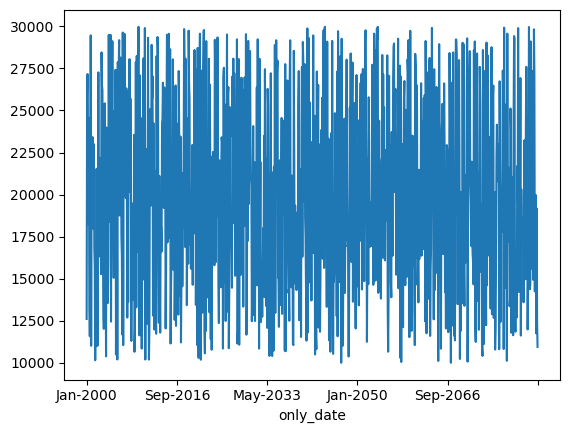

In [21]:
df.revenue.plot()

In [23]:
df['CAC']=df.marketing_spend / df.new_customers
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC
only_date,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628


In [25]:
df['ARPU']=df.revenue / df.total_customers
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU
only_date,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464


In [27]:
#lost_customers=last month total customer + this month new customer -this month total customer
df['lost_customers'] = df.total_customers.shift(1) + df.new_customers - df.total_customers
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers
only_date,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0


In [29]:
#churn rate
df['churn_rate'] = df.lost_customers / df.total_customers.shift(1)
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate
only_date,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN,NaN
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0,0.149351
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0,0.103896
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0,0.078550
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0,0.038462


In [31]:
#Average lifespam
df['average_lifespan']= 1/df.churn_rate
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan
only_date,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN,NaN,NaN
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0,0.149351,6.695652
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0,0.103896,9.625000
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0,0.078550,12.730769
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0,0.038462,26.000000


In [33]:
#LTV
df['LTV']=df.ARPU * df.average_lifespan
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan,LTV
only_date,,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN,NaN,NaN,NaN
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0,0.149351,6.695652,747.449275
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0,0.103896,9.625000,789.744335
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0,0.078550,12.730769,776.646872
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0,0.038462,26.000000,875.926063


In [35]:
#Burn Rate
df['burn_rate'] = df.marketing_spend + df.operating_expenses - df.revenue
df.head(10)

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan,LTV,burn_rate
only_date,,,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN,NaN,NaN,NaN,606
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0,0.149351,6.695652,747.449275,-6436
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0,0.103896,9.625000,789.744335,-9781
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0,0.078550,12.730769,776.646872,428
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0,0.038462,26.000000,875.926063,1680
Jun-2000,2000-06-01,24541,5376,9689,100,611,Jun-2000,53.760000,40.165303,30.0,0.055453,18.033333,724.314294,-9476
Jul-2000,2000-07-01,13152,6524,11267,167,768,Jul-2000,39.065868,17.125000,10.0,0.016367,61.100000,1046.337500,4639
Aug-2000,2000-08-01,11585,3500,12406,170,919,Aug-2000,20.588235,12.606094,19.0,0.024740,40.421053,509.551572,4321
Sep-2000,2000-09-01,13943,2285,16453,88,997,Sep-2000,25.965909,13.984955,10.0,0.010881,91.900000,1285.217352,4795


In [37]:
cash_on_hand = 100000 
df['runway_months'] = df.burn_rate.apply(
    lambda x: round(cash_on_hand / x, 1) if x > 0 else float('0')
)
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan,LTV,burn_rate,runway_months
only_date,,,,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN,NaN,NaN,NaN,606,165.0
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0,0.149351,6.695652,747.449275,-6436,0.0
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0,0.103896,9.625000,789.744335,-9781,0.0
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0,0.078550,12.730769,776.646872,428,233.6
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0,0.038462,26.000000,875.926063,1680,59.5


In [39]:
print("columns with null values")
df[df.isnull().any(axis=1)]

columns with null values


,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan,LTV,burn_rate,runway_months
only_date,,,,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN,NaN,NaN,NaN,606,165.0


In [41]:
rows_with_null = df[df.isnull().any(axis=1)]
df.fillna(0,inplace=True)
rows_with_null


,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan,LTV,burn_rate,runway_months
only_date,,,,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,NaN,NaN,NaN,NaN,606,165.0


In [43]:
df['LTV_CAC_ratio'] = (df.LTV / df.CAC).round(2)
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan,LTV,burn_rate,runway_months,LTV_CAC_ratio
only_date,,,,,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,0.0,0.000000,0.000000,0.000000,606,165.0,0.00
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0,0.149351,6.695652,747.449275,-6436,0.0,13.87
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0,0.103896,9.625000,789.744335,-9781,0.0,24.01
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0,0.078550,12.730769,776.646872,428,233.6,9.71
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0,0.038462,26.000000,875.926063,1680,59.5,38.62


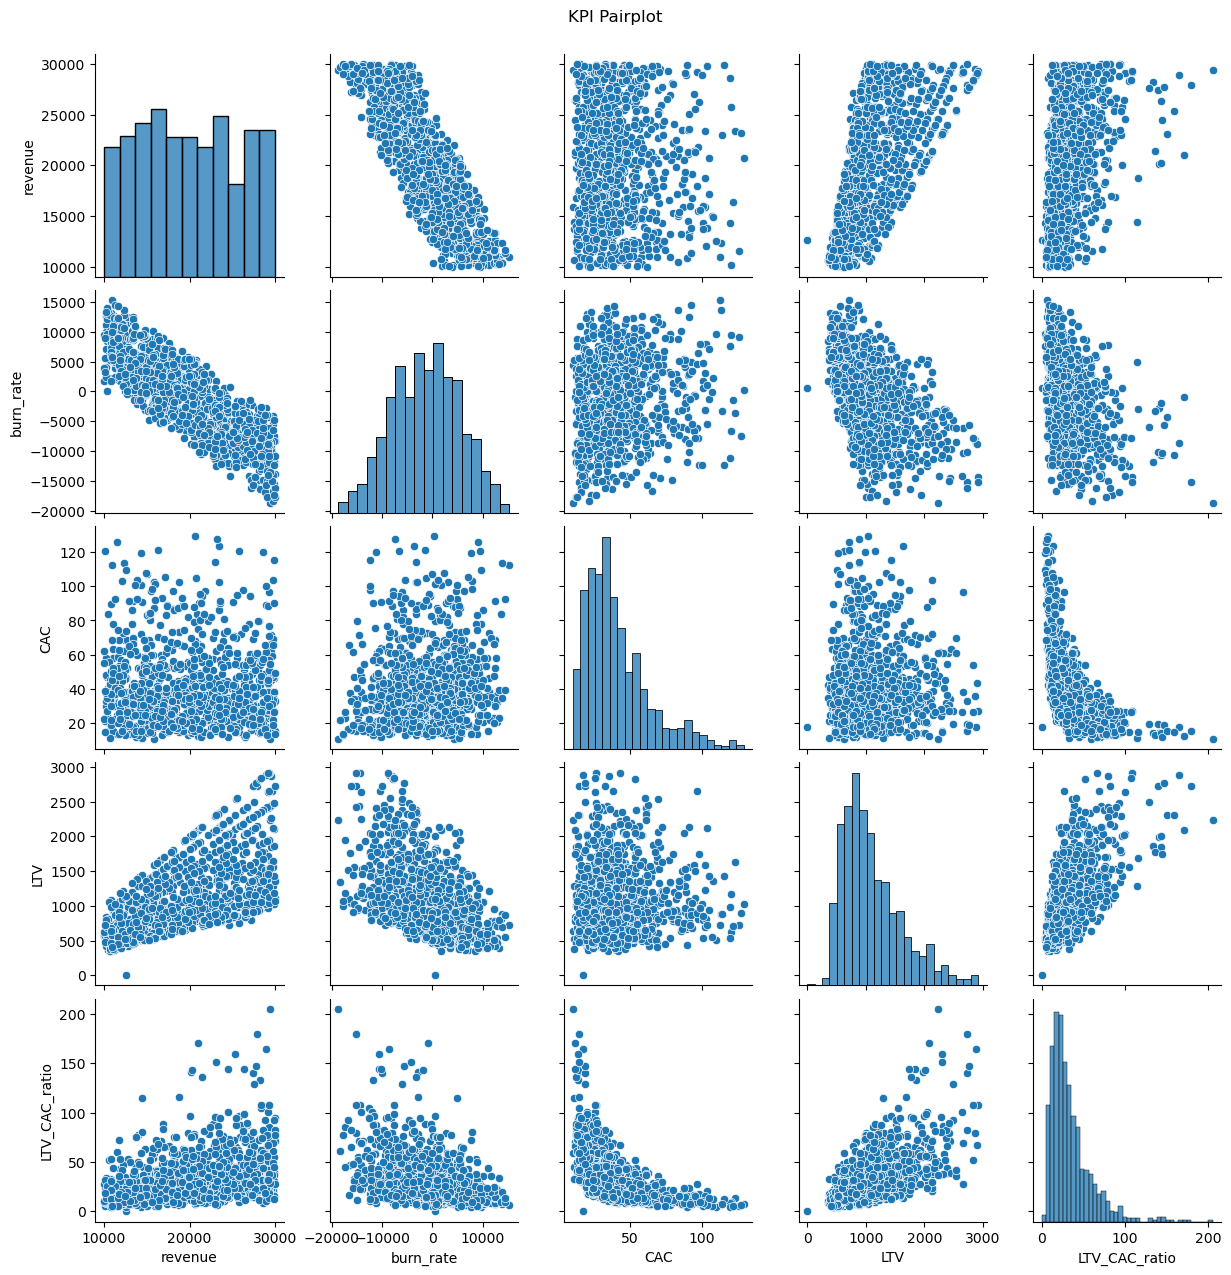

In [45]:
sb.pairplot(df[['revenue', 'burn_rate', 'CAC', 'LTV', 'LTV_CAC_ratio']])
plt.suptitle('KPI Pairplot', y=1.02)
plt.show()

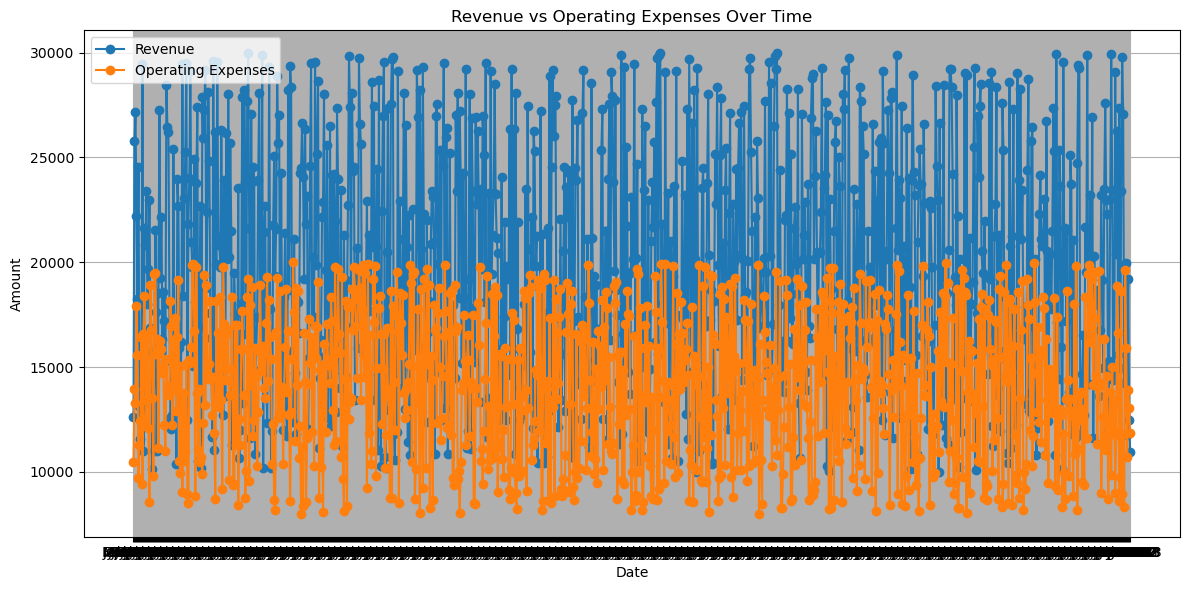

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df.revenue, label='Revenue', marker='o')
plt.plot(df.index, df.operating_expenses, label='Operating Expenses', marker='o')
plt.title('Revenue vs Operating Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

revenue over time


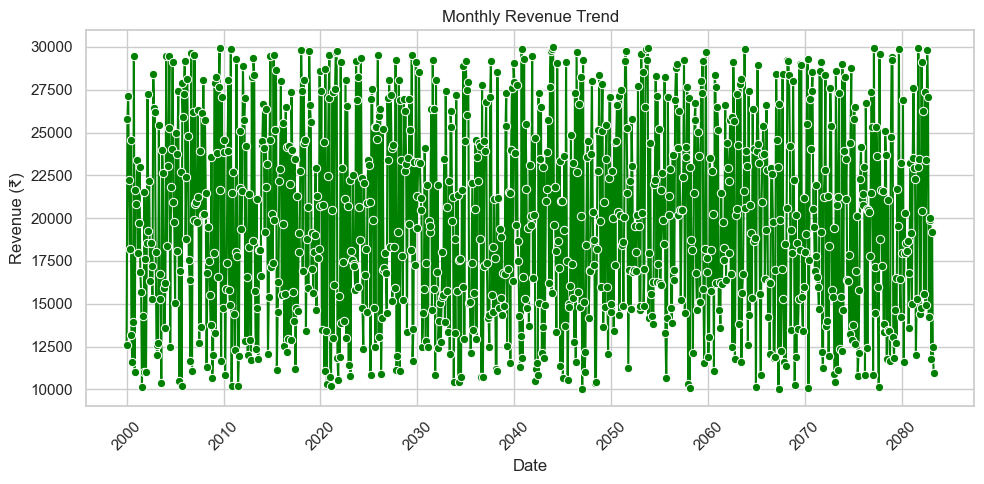

In [47]:
print('revenue over time')
sb.set(style='whitegrid')
plt.figure(figsize=(10, 5))  # Set the size of the plot (width=10, height=5 inches)
sb.lineplot(data=df, x='month', y='revenue', marker='o', color='green')
plt.title('Monthly Revenue Trend')      
plt.xlabel('Date')                     
plt.ylabel('Revenue (₹)')              
plt.xticks(rotation=45)                  
plt.tight_layout()                       
plt.show()                              


burn rate over time


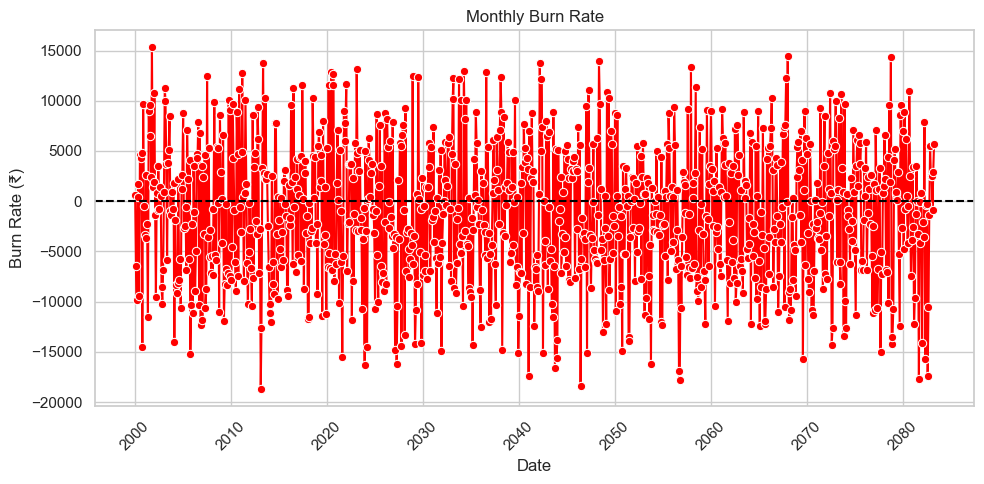

In [48]:
print('burn rate over time')
plt.figure(figsize=(10, 5))
sb.lineplot(data=df, x='month', y='burn_rate', marker='o', color='red')

plt.title('Monthly Burn Rate')
plt.xlabel('Date')
plt.ylabel('Burn Rate (₹)')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

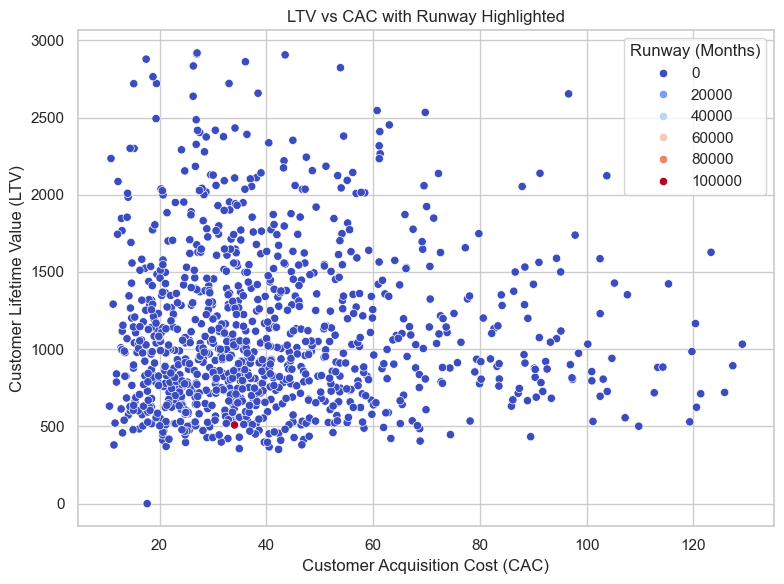

In [49]:
plt.figure(figsize=(8, 6))
sb.scatterplot(data=df, x='CAC', y='LTV', hue='runway_months', palette='coolwarm')

plt.title('LTV vs CAC with Runway Highlighted')
plt.xlabel('Customer Acquisition Cost (CAC)')
plt.ylabel('Customer Lifetime Value (LTV)')
plt.legend(title='Runway (Months)')
plt.grid(True)
plt.tight_layout()
plt.show()

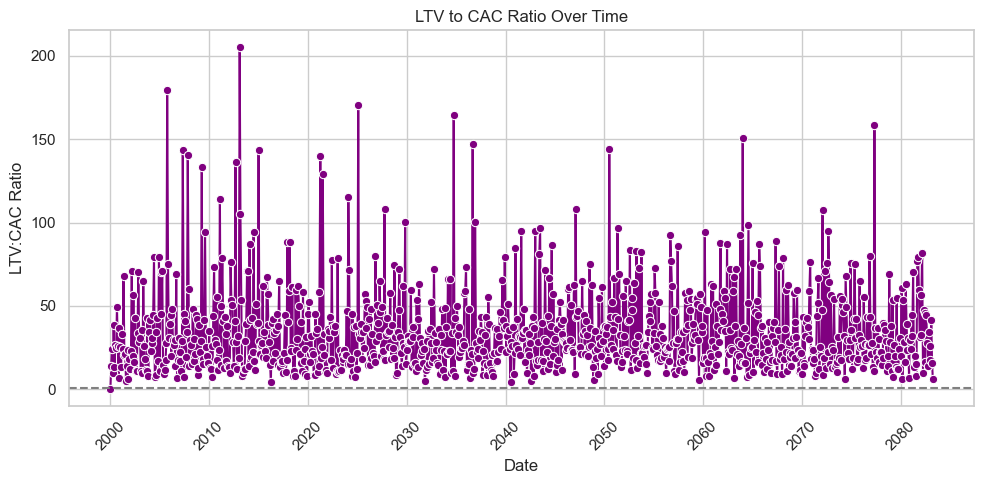

In [51]:
plt.figure(figsize=(10, 5))
sb.lineplot(data=df, x='month', y='LTV_CAC_ratio', marker='o', color='purple')

plt.title('LTV to CAC Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('LTV:CAC Ratio')
plt.axhline(1, color='gray', linestyle='--')  # Reference line for ideal ratio
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

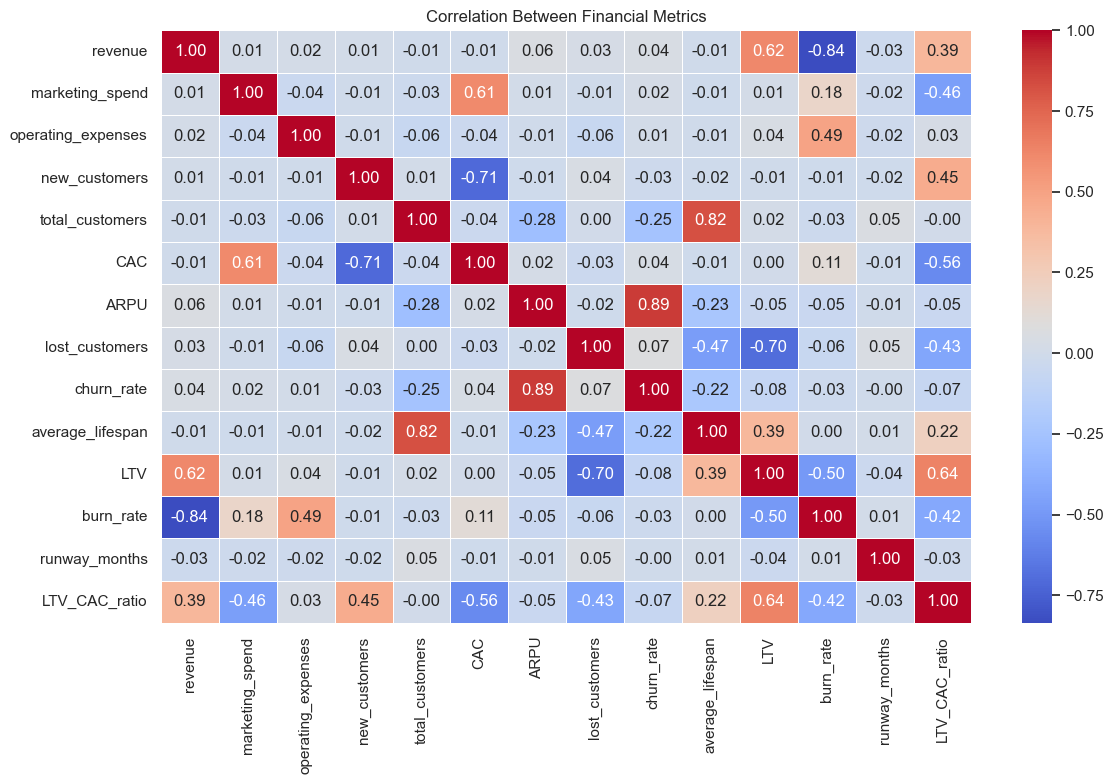

In [52]:
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Financial Metrics')
plt.tight_layout()
plt.show()

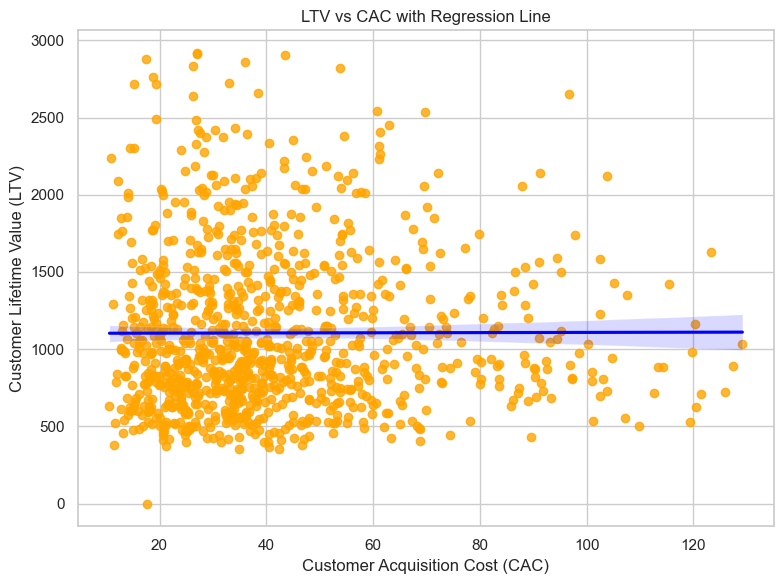

In [53]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='CAC', y='LTV', color='orange', line_kws={'color': 'blue'})

plt.title('LTV vs CAC with Regression Line')
plt.xlabel('Customer Acquisition Cost (CAC)')
plt.ylabel('Customer Lifetime Value (LTV)')
plt.grid(True)
plt.tight_layout()
plt.show()

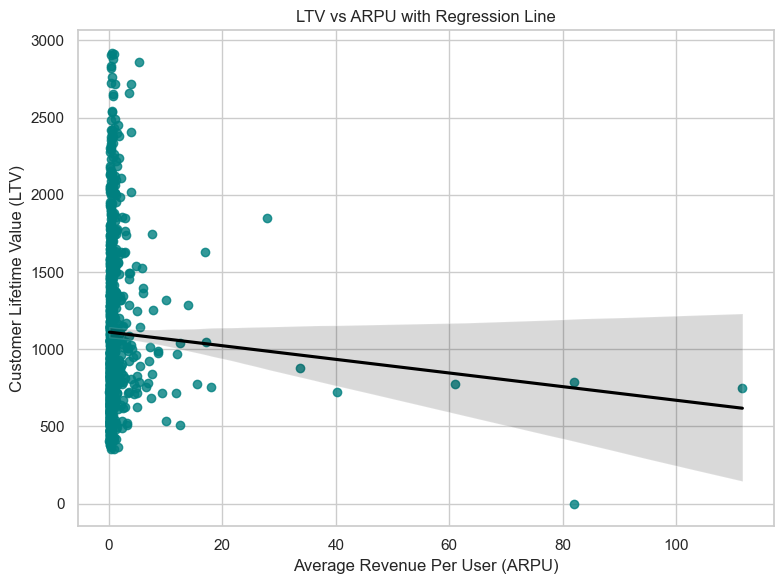

In [54]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='ARPU', y='LTV', color='teal', line_kws={'color': 'black'})

plt.title('LTV vs ARPU with Regression Line')
plt.xlabel('Average Revenue Per User (ARPU)')
plt.ylabel('Customer Lifetime Value (LTV)')
plt.grid(True)
plt.tight_layout()
plt.show()

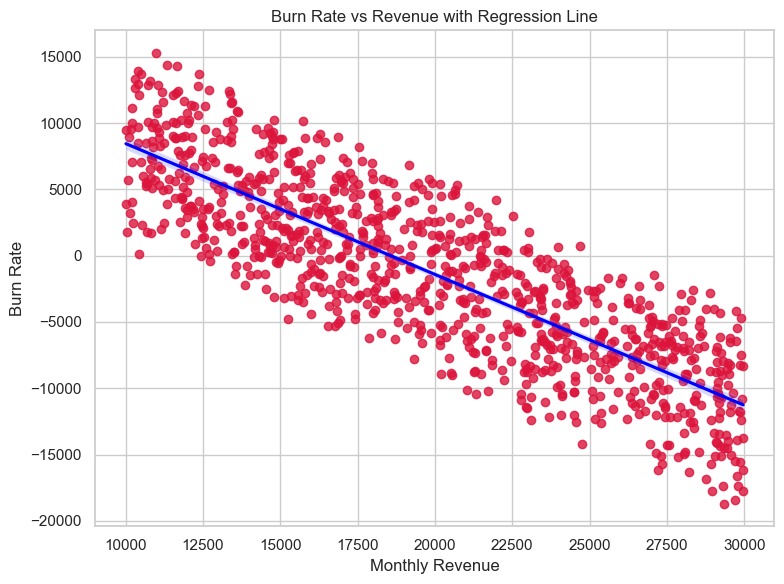

In [55]:
plt.figure(figsize=(8, 6))
sb.regplot(data=df, x='revenue', y='burn_rate', color='crimson', line_kws={'color': 'blue'})

plt.title('Burn Rate vs Revenue with Regression Line')
plt.xlabel('Monthly Revenue')
plt.ylabel('Burn Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
df.to_csv('cleaned_startup_data.csv',index=False)

In [65]:
df['cohort_month'] = df['month'].dt.to_period('M').astype(str)

In [69]:
df.head()

,month,revenue,marketing_spend,operating_expenses,new_customers,total_customers,date,CAC,ARPU,lost_customers,churn_rate,average_lifespan,LTV,burn_rate,runway_months,LTV_CAC_ratio,cohort_month
only_date,,,,,,,,,,,,,,,,,
Jan-2000,2000-01-01,12612,2722,10496,154,154,Jan-2000,17.675325,81.896104,0.0,0.000000,0.000000,0.000000,606,165.0,0.00,2000-01
Feb-2000,2000-02-01,25787,5389,13962,100,231,Feb-2000,53.890000,111.632035,23.0,0.149351,6.695652,747.449275,-6436,0.0,13.87,2000-02
Mar-2000,2000-03-01,27159,4079,13299,124,331,Mar-2000,32.895161,82.051360,24.0,0.103896,9.625000,789.744335,-9781,0.0,24.01,2000-03
Apr-2000,2000-04-01,22206,4717,17917,59,364,Apr-2000,79.949153,61.005495,26.0,0.078550,12.730769,776.646872,428,233.6,9.71,2000-04
May-2000,2000-05-01,18226,4332,15574,191,541,May-2000,22.680628,33.689464,14.0,0.038462,26.000000,875.926063,1680,59.5,38.62,2000-05


In [71]:
# Group by cohort month and sum new customers
cohort_summary = df.groupby('cohort_month')['new_customers'].sum().reset_index()


In [73]:
# Simulate monthly retention values
cohorts = []
for _, row in cohort_summary.iterrows():
    base = row['new_customers']
    decay = np.maximum(base - np.arange(12) * (base * 0.1), 0).astype(int)
    cohorts.append(decay)

In [75]:
# Create retention matrix
retention_matrix = pd.DataFrame(cohorts)
retention_matrix.index = cohort_summary['cohort_month']
retention_matrix.columns = [f"Month {i}" for i in range(12)]

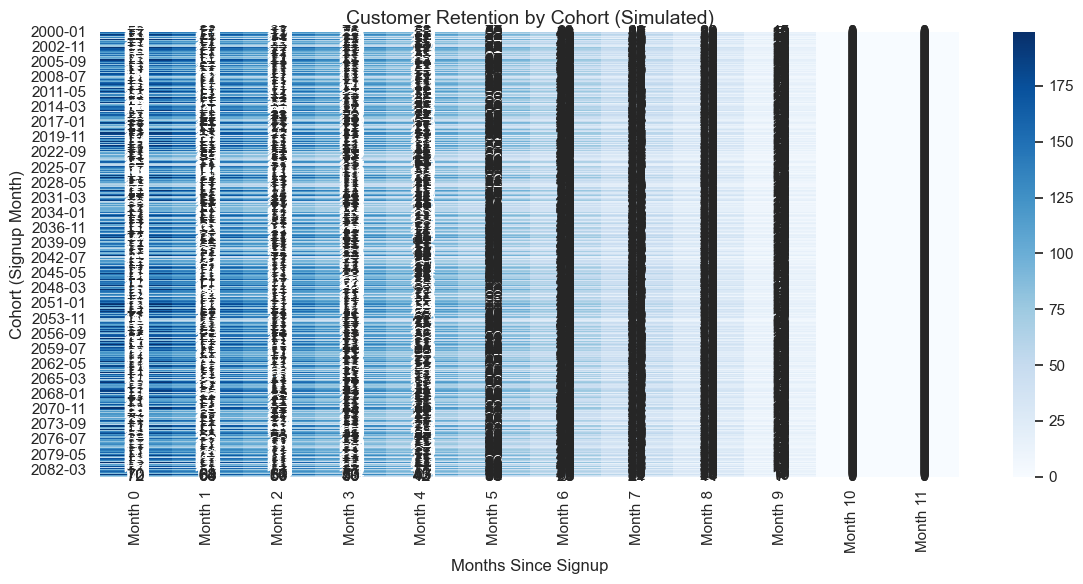

In [77]:
plt.figure(figsize=(12, 6))
sb.heatmap(retention_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Customer Retention by Cohort (Simulated)', fontsize=14)
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort (Signup Month)')
plt.tight_layout()
plt.show()

In [117]:
# Copy the original matrix to preserve it
retention_pct = retention_matrix.copy()

# Convert each row to percentage of Month 0
retention_pct = retention_pct.div(retention_pct['Month 0'], axis=0) * 100

# Round for cleaner display
retention_pct = retention_pct.round(1)

# View first few rows (optional)
retention_pct.head()


,Month 0,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11
cohort_month,,,,,,,,,,,,
2000-01,100.0,89.6,79.9,69.5,59.7,50.0,39.6,29.9,19.5,9.7,0.0,0.0
2000-02,100.0,90.0,80.0,70.0,60.0,50.0,40.0,30.0,20.0,10.0,0.0,0.0
2000-03,100.0,89.5,79.8,69.4,59.7,50.0,39.5,29.8,19.4,9.7,0.0,0.0
2000-04,100.0,89.8,79.7,69.5,59.3,49.2,39.0,28.8,18.6,8.5,0.0,0.0
2000-05,100.0,89.5,79.6,69.6,59.7,49.7,39.8,29.8,19.9,9.9,0.0,0.0


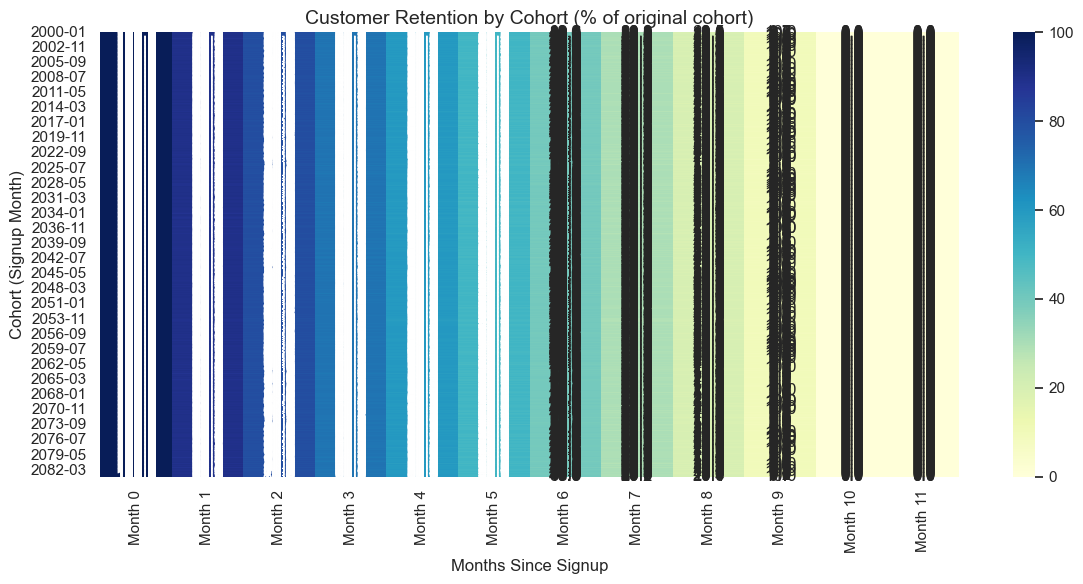

In [121]:
plt.figure(figsize=(12, 6))
sb.heatmap(retention_pct, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Customer Retention by Cohort (% of original cohort)', fontsize=14)
plt.xlabel('Months Since Signup')
plt.ylabel('Cohort (Signup Month)')
plt.tight_layout()
plt.show()

In [123]:
# Convert to percentage
retention_pct = retention_matrix.div(retention_matrix['Month 0'], axis=0) * 100
retention_pct = retention_pct.round(1)

# Save to CSV
retention_pct.to_csv("cohort_retention_percentage.csv")